In [119]:
import numpy as np
import pandas as pd
import sklearn

In [92]:
# Importing the dataset
dataset = pd.read_csv("C:\\Users\\shash\\OneDrive\\Documents\\KNN3.CSV")


In [93]:
dataset.shape


(128, 4)

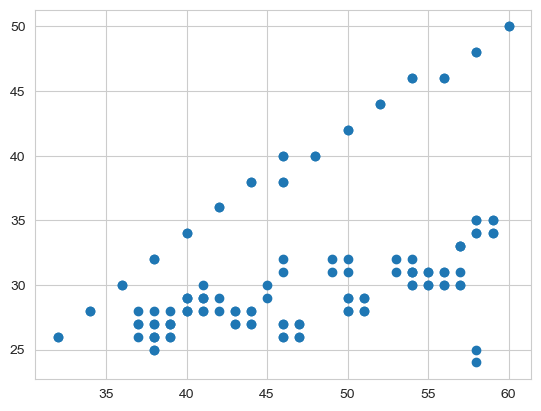

In [94]:

plt.scatter(dataset["CHEST"], dataset["LENGTH"])

In [95]:
dataset.head(5)

,CLOTH,CHEST,LENGTH,SIZE
0,T-shirt,37,26,S
1,T-shirt,37,27,S
2,T-shirt,39,27,M
3,T-shirt,42,28,M
4,T-shirt,45,29,XL


In [96]:
dataset.describe()

,CHEST,LENGTH
count,128.000000,128.000000
mean,47.125000,31.492188
std,7.607497,5.875340
min,32.000000,24.000000
25%,40.000000,28.000000
50%,46.000000,30.000000
75%,54.000000,33.250000
max,60.000000,50.000000


In [97]:
dataset.groupby('SIZE').size()

SIZE
2XL     4
3XL    22
4XL    16
L      10
M      18
S      22
XL     24
XXL    12
dtype: int64

In [98]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['CLOTH'] = le.fit_transform(dataset['CLOTH'])
feature_columns = ['CLOTH','CHEST','LENGTH']
print(feature_columns)
dataset

['CLOTH', 'CHEST', 'LENGTH']


,CLOTH,CHEST,LENGTH,SIZE
0,1,37,26,S
1,1,37,27,S
2,1,39,27,M
3,1,42,28,M
4,1,45,29,XL
...,...,...,...,...
123,4,51,29,XXL
124,4,55,31,3XL
125,4,56,31,3XL
126,4,57,33,3XL


In [99]:
X = dataset[feature_columns].values
y = dataset['SIZE'].values

In [100]:
#convert string label into integer value
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [102]:
#feature scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

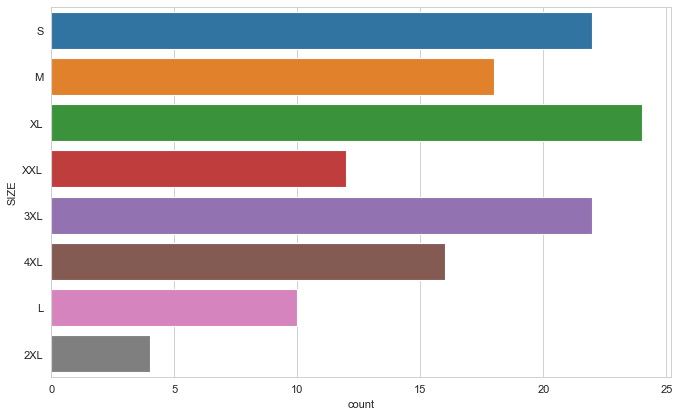

In [104]:
plt.figure(figsize=(10, 6), dpi=80)
sns.countplot(y=dataset["SIZE"])
plt.show()

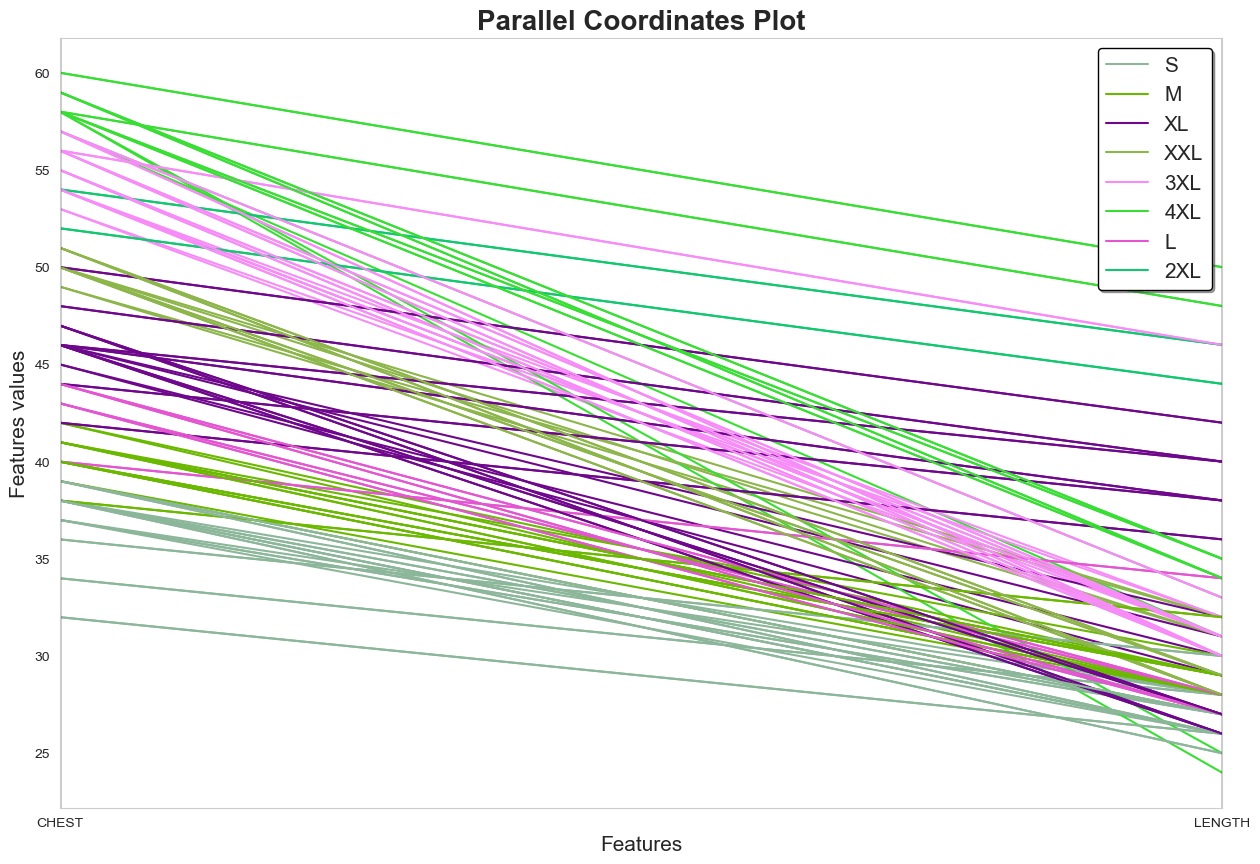

In [105]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(dataset.drop("CLOTH", axis=1), "SIZE")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

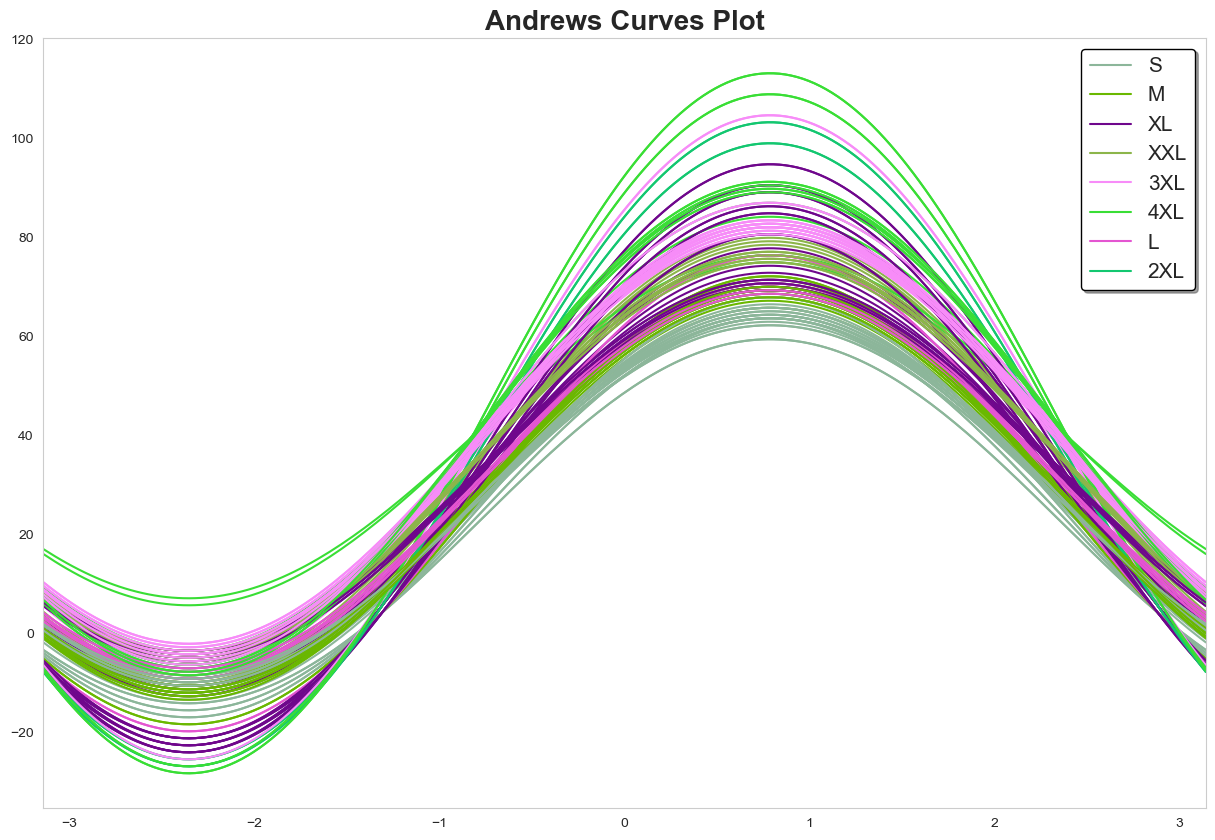

In [106]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(dataset.drop("CLOTH", axis=1), "SIZE")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [ ]:
plt.figure()
dataset.boxplot(by="SIZE", figsize=(15, 10))
plt.show()

In [ ]:
fig, axes = plt.subplots(figsize=(20, 10), nrows=3, ncols=3)

colors = ["#5bde54","#de5454", "#db53d5"]

# Histograms
col_no = 0
for col in dataset.columns[:-1]:
    sns.histplot(x=col, data=dataset, ax=axes[0, col_no], bins=20, color=colors[col_no])
    sns.kdeplot(x=col, data=dataset, ax=axes[1, col_no], color=colors[col_no])
    sns.boxplot(x=col, data=dataset, ax=axes[2, col_no], color=colors[col_no])
    col_no += 1

In [ ]:
#test dataset
test_dataset = pd.read_csv("C:\\Users\\shash\\OneDrive\\Documents\\knn_test.csv")

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=5)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

print(y_pred)

[3 5 6 6 5 1 2 5 6 1 1 4 6 2 1 4 5 7 3 4 7 1 5 4 3 6]


C:\Users\shash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [109]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model before using bagging is equal to ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model before using bagging is equal to 80.77 %.


In [110]:

# Create a KNN classifier as the base estimator
knn = KNeighborsClassifier(n_neighbors=3)

# Create a BaggingClassifier with KNN as the base estimator
bagging_knn = BaggingClassifier(base_estimator=knn, n_estimators=10, max_samples=0.8, max_features=0.8)

# Fit the bagging KNN classifier on the training data
bagging_knn.fit(X_train, y_train)

# Predict the target values on the test data
y_pred_bag = bagging_knn.predict(X_test)



In [111]:
cm = confusion_matrix(y_test, y_pred_bag)
cm

array([[5, 0, 0, 0, 0, 0, 0],
       [1, 2, 0, 0, 0, 0, 0],
       [0, 0, 2, 1, 0, 0, 0],
       [0, 0, 0, 4, 1, 0, 0],
       [0, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 0, 5, 0],
       [0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [112]:
accuracy = accuracy_score(y_test, y_pred_bag)*100
print('Accuracy of our model after using bagging is equal to ' + str(round(accuracy, 2)) + ' %.')


Accuracy of our model after using bagging is equal to 88.46 %.


In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_bag))

              precision    recall  f1-score   support

           1       0.83      1.00      0.91         5
           2       1.00      0.67      0.80         3
           3       1.00      0.67      0.80         3
           4       0.80      0.80      0.80         5
           5       0.80      1.00      0.89         4
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         1

    accuracy                           0.88        26
   macro avg       0.92      0.88      0.89        26
weighted avg       0.90      0.88      0.88        26



In [114]:
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

C:\Users\shash\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\shash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\shash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this beh

<Figure size 640x480 with 0 Axes>

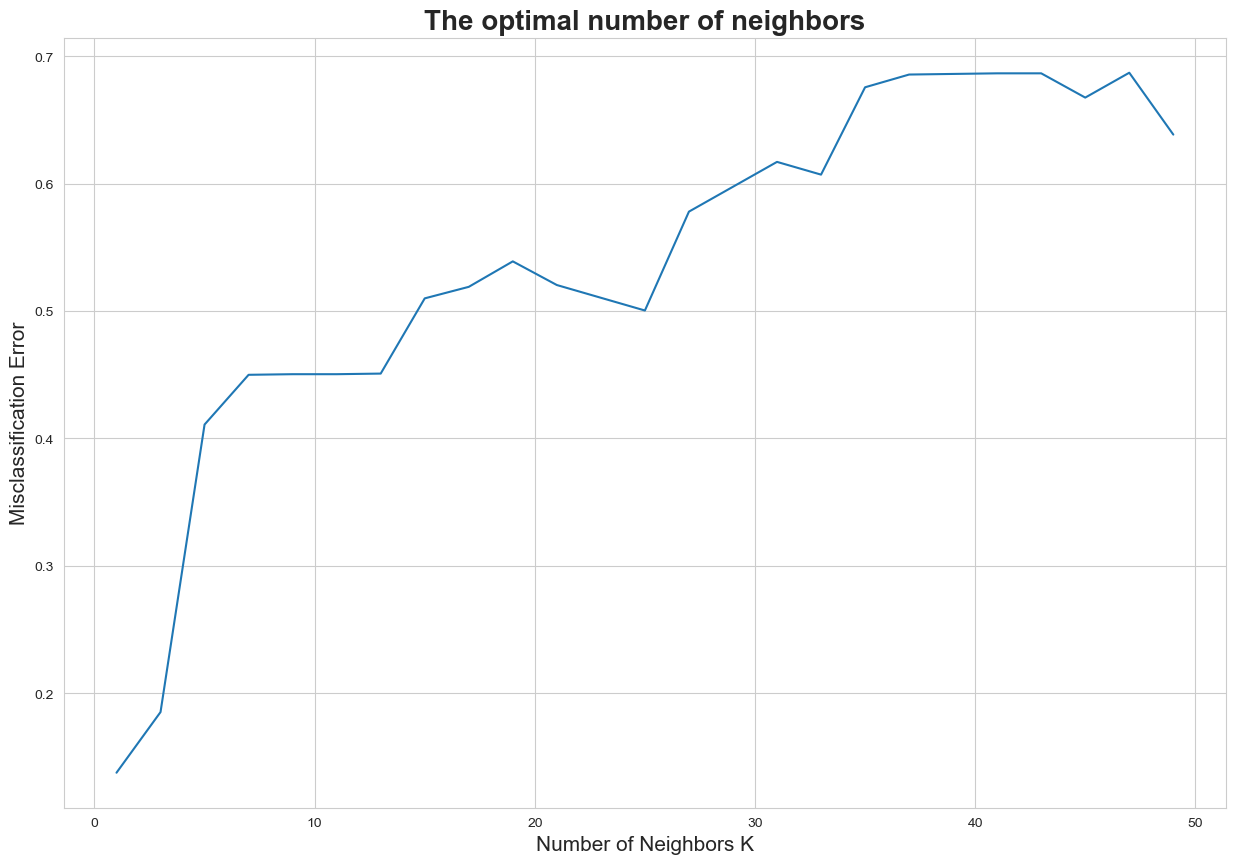

In [115]:
# changing to misclassification error
MSE = [1 - X for X in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [116]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 1.


In [118]:
print(confusion_matrix(y_test,y_pred_bag))

[[5 0 0 0 0 0 0]
 [1 2 0 0 0 0 0]
 [0 0 2 1 0 0 0]
 [0 0 0 4 1 0 0]
 [0 0 0 0 4 0 0]
 [0 0 0 0 0 5 0]
 [0 0 0 0 0 0 1]]


<AxesSubplot:>

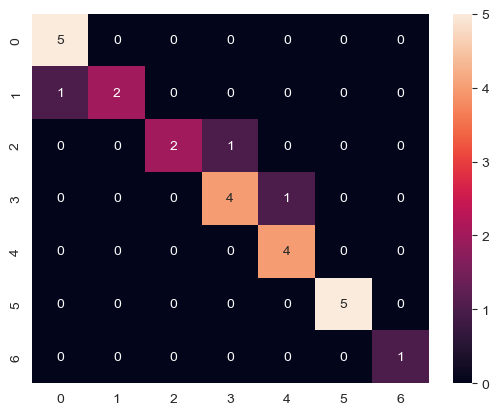

In [83]:
sns.heatmap(confusion_matrix(y_test,y_pred_bag),annot= True ,fmt='.2g')

In [84]:
#own predict testing
import numpy as np
import pandas as pd
import scipy as sp

class MyKNeighborsClassifier():
    
    def __init__(self, n_neighbors=5):
        self.n_neighbors=n_neighbors
        
    def fit(self, X, y):
        n_samples = X.shape[0]
        # number of neighbors can't be larger then number of samples
        if self.n_neighbors > n_samples:
            raise ValueError("Number of neighbors can't be larger then number of samples in training set.")
        
        # X and y need to have the same number of samples
        if X.shape[0] != y.shape[0]:
            raise ValueError("Number of samples in X and y need to be equal.")
        
        # finding and saving all possible class labels
        self.classes_ = np.unique(y)
        
        self.X = X
        self.y = y
        
    def predict(self, X_test):
        
        # number of predictions to make and number of features inside single sample
        n_predictions, n_features = X_test.shape
        
        # allocationg space for array of predictions
        predictions = np.empty(n_predictions, dtype=int)
        
        # loop over all observations
        for i in range(n_predictions):
            # calculation of single prediction
            predictions[i] = single_prediction(self.X, self.y, X_test[i, :], self.n_neighbors)

        return(predictions)

In [85]:
def single_prediction(X, y, x_train, k):
    
    # number of samples inside training set
    n_samples = X.shape[0]
    
    # create array for distances and targets
    distances = np.empty(n_samples, dtype=np.float64)

    # distance calculation
    for i in range(n_samples):
        distances[i] = (x_train - X[i]).dot(x_train - X[i])
    
    # combining arrays as columns
    distances = sp.c_[distances, y]
    # sorting array by value of first column
    sorted_distances = distances[distances[:,0].argsort()]
    # celecting labels associeted with k smallest distances
    targets = sorted_distances[0:k,1]

    unique, counts = np.unique(targets, return_counts=True)
    return(unique[np.argmax(counts)])

In [86]:
my_classifier = MyKNeighborsClassifier(n_neighbors=3)

# Fitting the model
my_classifier.fit(X_train, y_train)

# Predicting the Test set results
my_y_pred = my_classifier.predict(X_test)

In [87]:
accuracy = accuracy_score(y_test, my_y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 88.46 %.
